In [1]:
import pandas as pd
import numpy as np

# โหลดไฟล์ CSV ที่มี missing values
df = pd.read_csv('iot_2023_missing.csv')

#check miising 
df.isnull().sum().sum()

np.int64(1897)

In [2]:
#check miising 
df.isnull().sum()

original_index      0
code                0
name                0
at_date             0
month             214
at_time             0
pm25              211
pm10              218
temperature       196
humidity          196
hour              229
day_type          222
weekday           197
time_of_day       214
lat                 0
lon                 0
datetime            0
dtype: int64

In [6]:
# ใช้วิธี backward fill (bfill) เพื่อแทนค่าที่หายไปด้วยค่าถัดไป ลบ column code
df_cleaned = df.fillna(method='bfill')
df_cleaned = df_cleaned.drop(columns=['code'])

# บันทึก DataFrame ที่ถูก clean แล้วเป็นไฟล์ใหม่
df_cleaned.to_csv('iot_2023_cleaned.csv', index=False)

C:\Users\grace\AppData\Local\Temp\ipykernel_27848\2009959042.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='bfill')


In [7]:
df_cleaned.isnull().sum()

original_index    0
name              0
at_date           0
month             0
at_time           0
pm25              0
pm10              0
temperature       0
humidity          0
hour              0
day_type          0
weekday           0
time_of_day       0
lat               0
lon               0
datetime          0
dtype: int64

In [8]:
#ตรวจสอบข้อมูลทางสถิติพื้นฐาน
df_cleaned.describe()

,original_index,month,at_time,pm25,pm10,temperature,humidity,hour,weekday,lat,lon
count,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000,7055.000000
mean,3740.900780,8.247484,11.563997,22.770064,33.200808,27.116485,34.542778,11.564564,2.968108,14.839506,101.074077
std,2161.581958,3.180647,6.919900,18.848341,27.620537,3.919130,6.210358,6.917046,1.945669,1.700853,0.969320
min,0.000000,1.000000,0.000000,1.000000,0.000000,10.200000,13.000000,0.000000,0.000000,13.847000,100.513600
25%,1859.500000,6.000000,6.000000,8.600000,12.000000,24.800000,30.000000,6.000000,1.000000,13.847000,100.513600
50%,3747.000000,9.000000,12.000000,16.600000,23.300000,27.300000,34.600000,12.000000,3.000000,13.847000,100.513600
75%,5620.500000,11.000000,18.000000,32.700000,49.000000,29.700000,38.800000,18.000000,5.000000,17.386000,101.288000
max,7477.000000,12.000000,23.000000,137.300000,181.500000,44.600000,65.000000,23.000000,6.000000,18.360600,104.778500


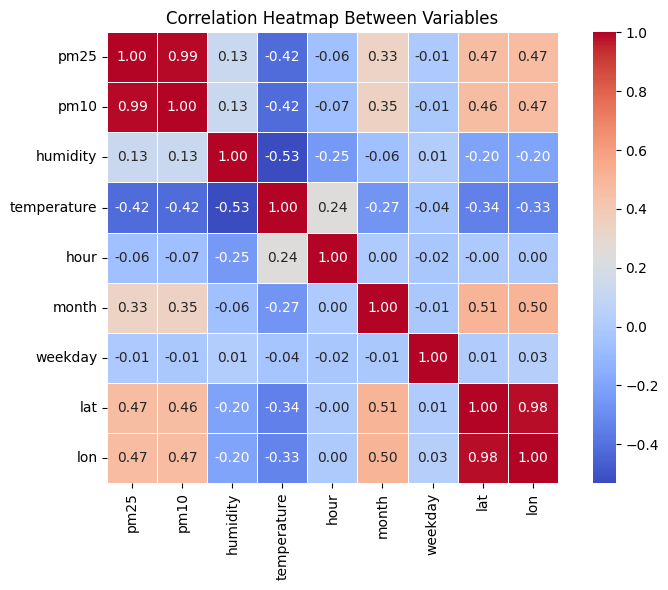

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# check correlation 
correlation_matrix = df_cleaned[['pm25', 'pm10', 'humidity', 'temperature', 'hour',"month","weekday","lat","lon"]].corr()

# วาด Heatmap พร้อมตัวเลข (annot=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap Between Variables')
plt.tight_layout()
plt.show()

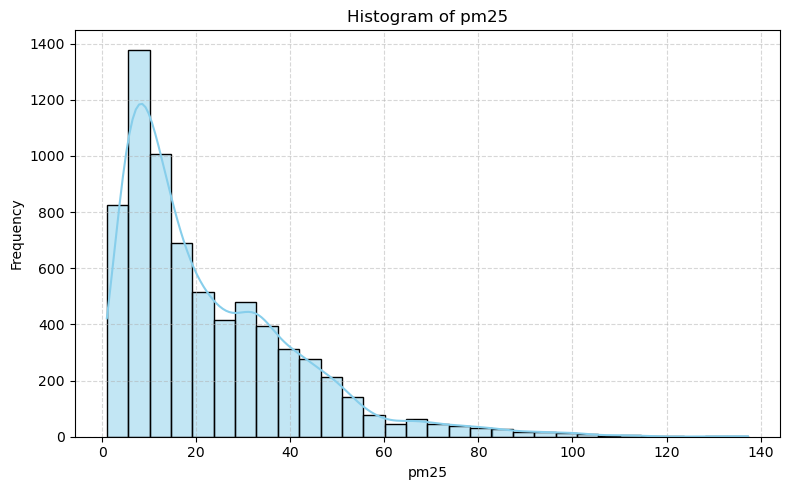

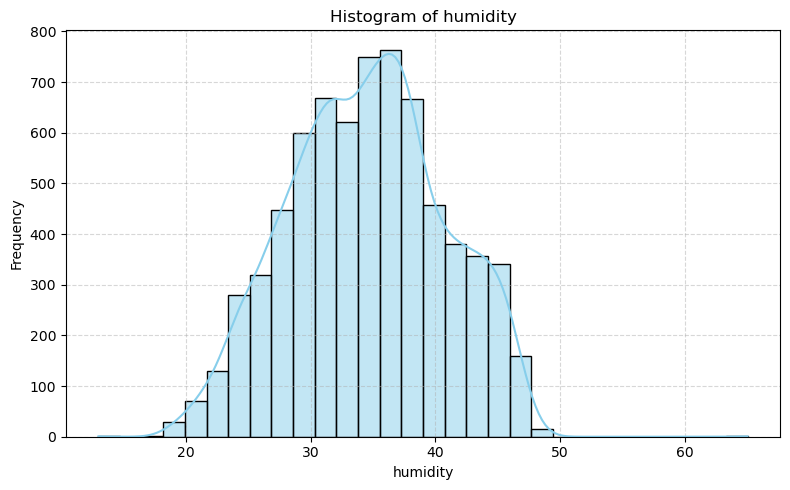

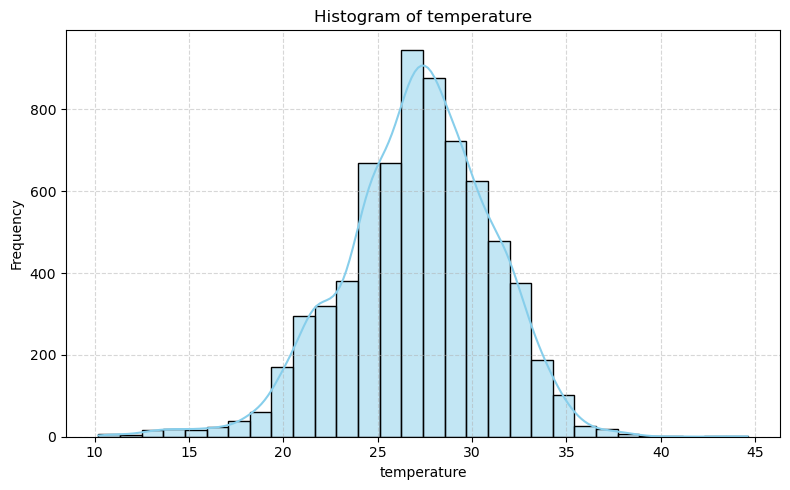

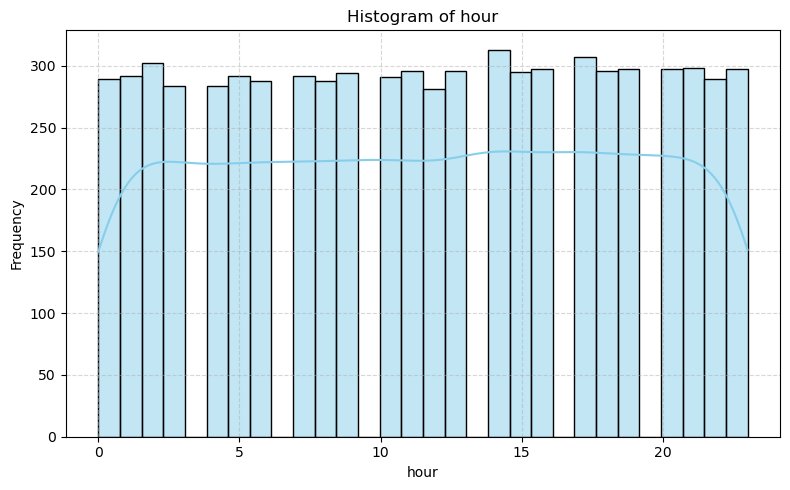

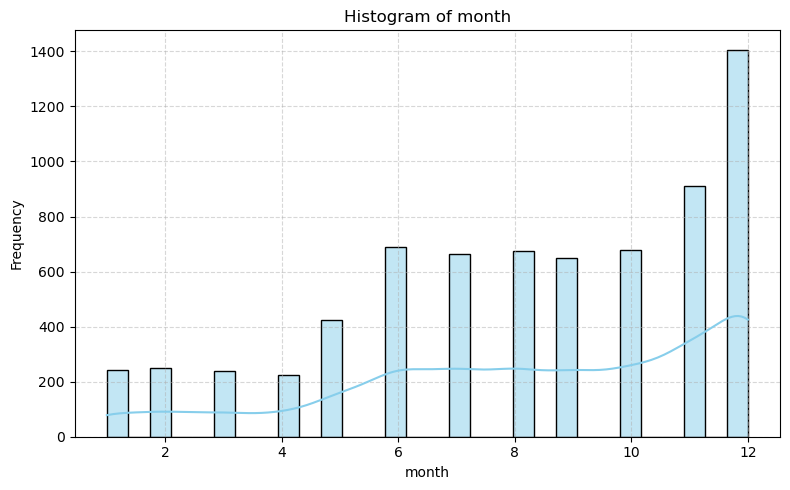

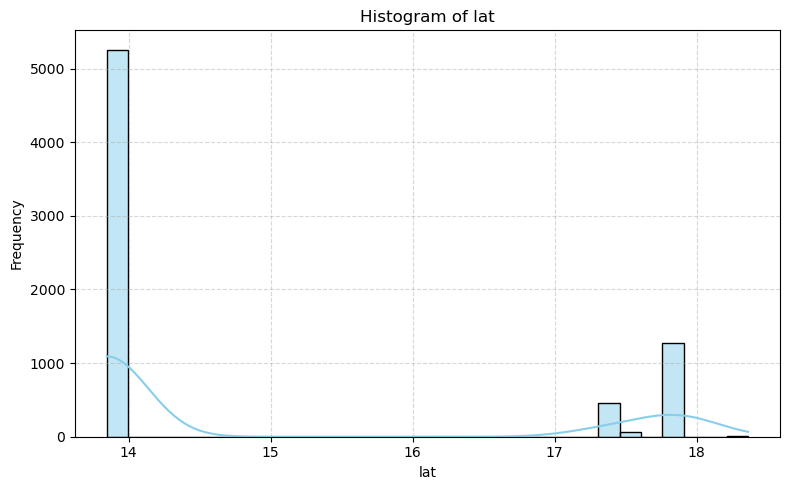

In [32]:
features = ['pm25', 'humidity', 'temperature', 'hour', 'month', 'lat']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_19320\1530622529.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='temp_group', y='pm25', palette='Set2')


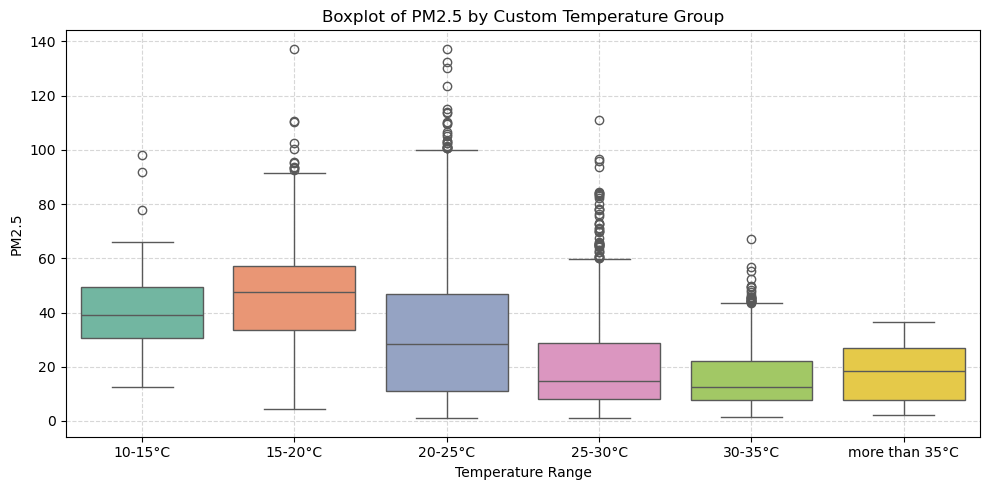

In [33]:
# ตรวจสอบ outlier ของข้อมูล
bins = [10, 15, 20, 25, 30, 35, 45]  # ต้องครอบคลุมค่าอุณหภูมิทั้งหมด
labels = ['10-15°C', '15-20°C', '20-25°C', '25-30°C', '30-35°C', 'more than 35°C']

df_cleaned['temp_group'] = pd.cut(df_cleaned['temperature'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='temp_group', y='pm25', palette='Set2')
plt.title('Boxplot of PM2.5 by Custom Temperature Group')
plt.xlabel('Temperature Range')
plt.ylabel('PM2.5')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import zscore
import pandas as pd

# โหลดไฟล์ที่ clean แล้ว แปลงให้เป็นชนิดวันที่
df_cleaned = pd.read_csv("iot_2023_cleaned.csv", parse_dates=["at_date"])

# One-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['time_of_day', 'weekday'], prefix=['time_of_day', 'weekday'])

# ลบ pm10 และ lon
df_cleaned = df_cleaned.drop(columns=['pm10', 'lon'])

In [13]:
# กำหนดชื่อคอลัมน์ที่ต้องการคำนวณ z-score
columns_to_zscore = ['pm25', 'humidity', 'temperature', 'hour', 'month', 'lat']

# คำนวณ z-score และเพิ่มเป็นคอลัมน์ใหม่ใน df1
df1 = df_cleaned.copy()
df1[columns_to_zscore] = df_cleaned[columns_to_zscore].apply(zscore)

# เงื่อนไขหา outliers (ค่า z-score > 3 หรือ < -3)
outlier_condition = (df1[columns_to_zscore] > 3) | (df1[columns_to_zscore] < -3)

# ลบแถวที่มีค่า outliers อย่างน้อย 1 คอลัมน์
df_no_outliers = df1[~outlier_condition.any(axis=1)]

# แสดงผล DataFrame หลังลบ outliers
print(df_no_outliers.head())

   original_index                                 name    at_date     month  \
3               4          กองดิจิทัลเพื่อการควบคุมโรค  5/11/2023  0.865456   
4               5                         กรมควบคุมโรค  5/11/2023  0.865456   
5               6  กรมควบคุมโรค ลานอเนกประสงค์ อาคาร 1  19/5/2023 -1.021086   
6               7  กรมควบคุมโรค ลานอเนกประสงค์ อาคาร 1  19/5/2023 -1.021086   
7               8  กรมควบคุมโรค ลานอเนกประสงค์ อาคาร 1  22/5/2023 -1.021086   

   at_time      pm25  temperature  humidity      hour day_type  ...  \
3       16  0.542788    -1.280090  0.685552  0.641278  Weekend  ...   
4       17  0.383612    -1.050431  0.315177  0.785859  Weekend  ...   
5       15  0.723188     2.266866 -1.890972  0.496697  Weekday  ...   
6       16  0.638294     2.241349 -1.890972  0.641278  Weekday  ...   
7        6  0.325247     2.802738 -2.068108 -0.804528  Weekday  ...   

   time_of_day_Evening time_of_day_Morning  time_of_day_Night  weekday_0.0  \
3                Fal

In [36]:
df_no_outliers.shape

(6872, 23)

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# สร้างฟีเจอร์และ target
features = ['humidity', 'temperature', 'hour', 'month', 'lat'] + \
    [col for col in df_no_outliers.columns if col.startswith('time_of_day_') or col.startswith('weekday_')]
target = 'pm25'

#ตัวแปนต้น ตัวแปน
X = df_no_outliers[features]
y = df_no_outliers[target]

# แบ่งชุด train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้าง Polynomial Features (degree=3) สำหรับ Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# สร้างโมเดล
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.01),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Polynomial Regression": LinearRegression()}

results = []
for name, model in models.items():
    # Polynomial Regression
    if name == "Polynomial Regression":
        model.fit(X_train_poly, y_train)
        y_pred_test = model.predict(X_test_poly)
        y_pred_train = model.predict(X_train_poly)
    
    # Linear/Ridge Regression
    elif name in ["Linear Regression", "Ridge Regression","Lasso Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred_test = model.predict(X_test_scaled)
        y_pred_train = model.predict(X_train_scaled)
    
    # Random Forest (Tree-based)
    else:
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

    # คำนวณค่าชี้วัด
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    results.append({
        "Model": name,
        "Train MSE": round(mse_train, 4),
        "Train R²": round(r2_train, 2),
        "Test MSE": round(mse_test, 4),
        "Test R²": round(r2_test, 2)
    })

# แสดงผล
results_df = pd.DataFrame(results)
print("📊 ผลลัพธ์การเปรียบเทียบโมเดล (Train vs Test):")
print(results_df)


📊 ผลลัพธ์การเปรียบเทียบโมเดล (Train vs Test):
                   Model  Train MSE  Train R²  Test MSE  Test R²
0      Linear Regression     0.5466      0.28    0.5149     0.28
1       Ridge Regression     0.5466      0.28    0.5149     0.28
2       Lasso Regression     0.5474      0.28    0.5150     0.28
3          Random Forest     0.0221      0.97    0.1544     0.78
4  Polynomial Regression     0.3729      0.51    0.3612     0.50


C:\Users\Asus\miniconda3\envs\tutorial\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


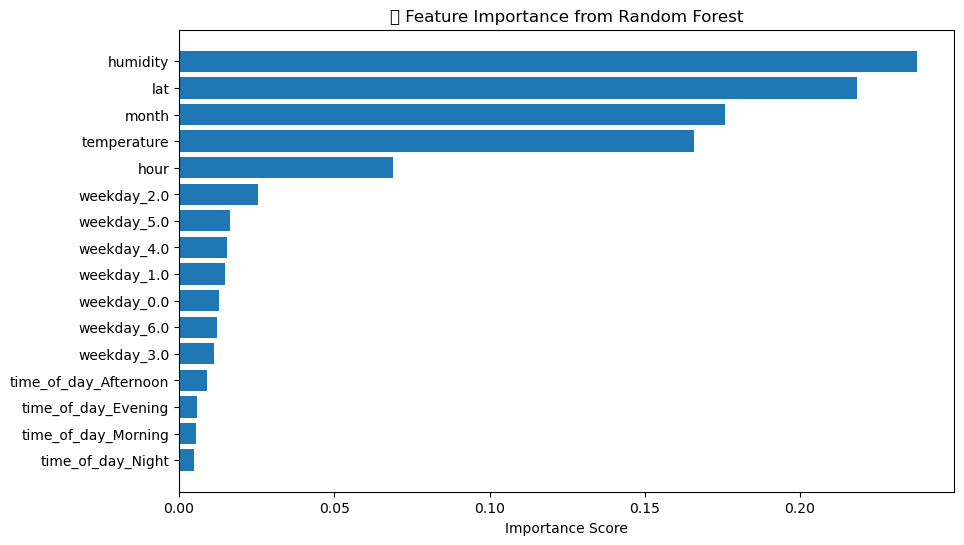

In [38]:
# STEP 9: วิเคราะห์ความสำคัญของตัวแปร (Feature Importance)
import matplotlib.pyplot as plt

# ดึงความสำคัญของฟีเจอร์จาก Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
feature_names = X_train.columns

# จัดเรียงตามลำดับความสำคัญ
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# แสดงผล
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title('🔍 Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.show()

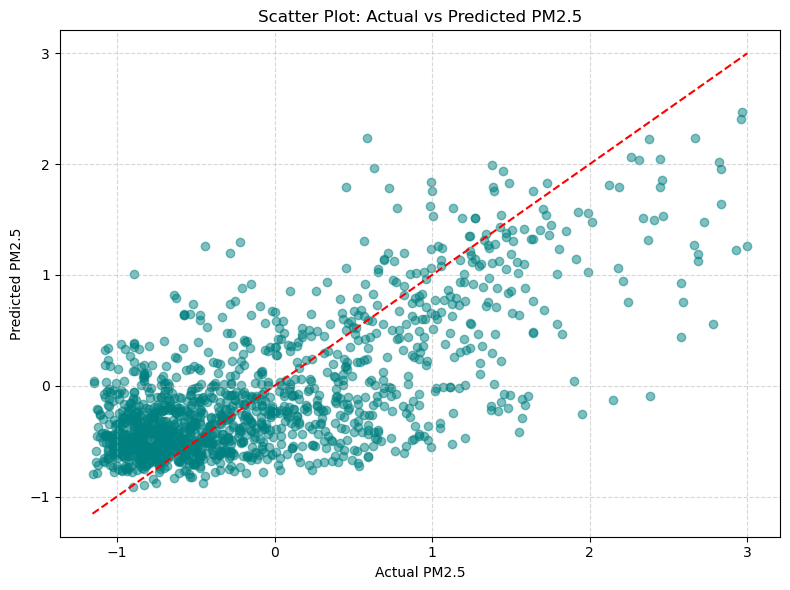

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # เส้น y = x
plt.title('Scatter Plot: Actual vs Predicted PM2.5')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [49]:
# --- เลือกโมเดลที่ดีที่สุด 
best_model = models["Random Forest"]

# --- พยากรณ์ทั้งชุด X 
model_df = df_no_outliers.copy()
model_df['pm25_predicted'] = best_model.predict(X)

# --- สร้าง compare_df ---
compare_df = model_df[['datetime', 'pm25', 'pm25_predicted', 'day_type']].copy()
compare_df.rename(columns={'pm25': 'pm25_actual'}, inplace=True)
compare_df['hour'] = pd.to_datetime(compare_df['datetime']).dt.hour

# --- ค่า mean/std จาก df_cleaned เพื่อนำกลับจาก z-score ---
mean_real_pm25 = df_cleaned['pm25'].mean()
std_real_pm25 = df_cleaned['pm25'].std()

# --- แปลงกลับจาก z-score เป็นค่าจริง ---
compare_df['pm25_actual'] = compare_df['pm25_actual'] * std_real_pm25 + mean_real_pm25
compare_df['pm25_predicted'] = compare_df['pm25_predicted'] * std_real_pm25 + mean_real_pm25


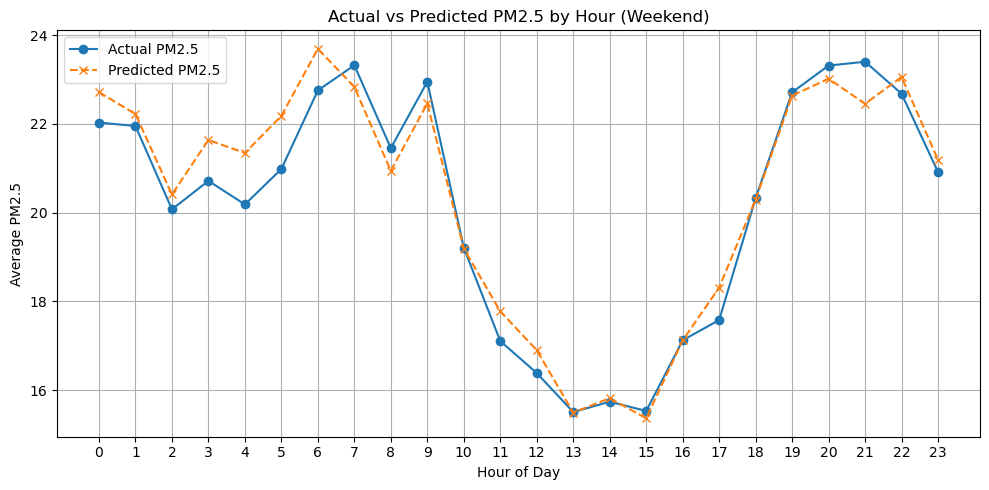

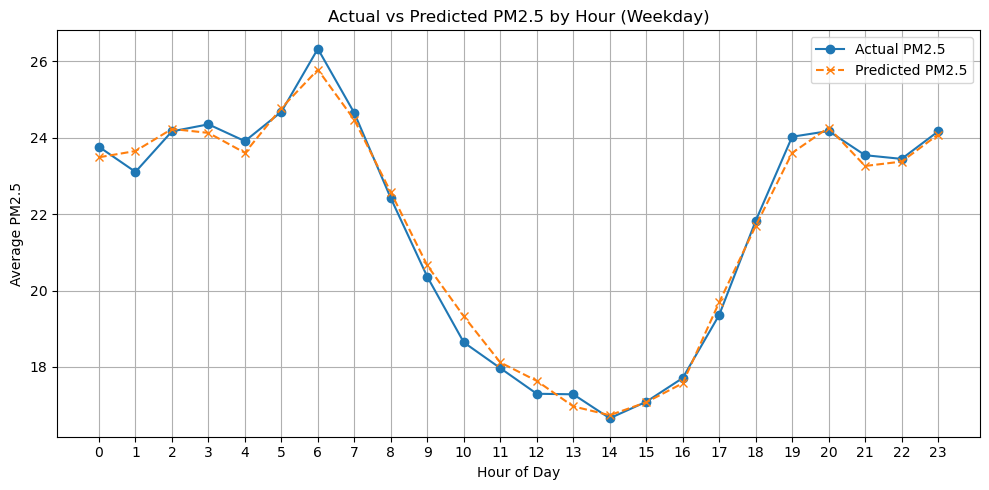

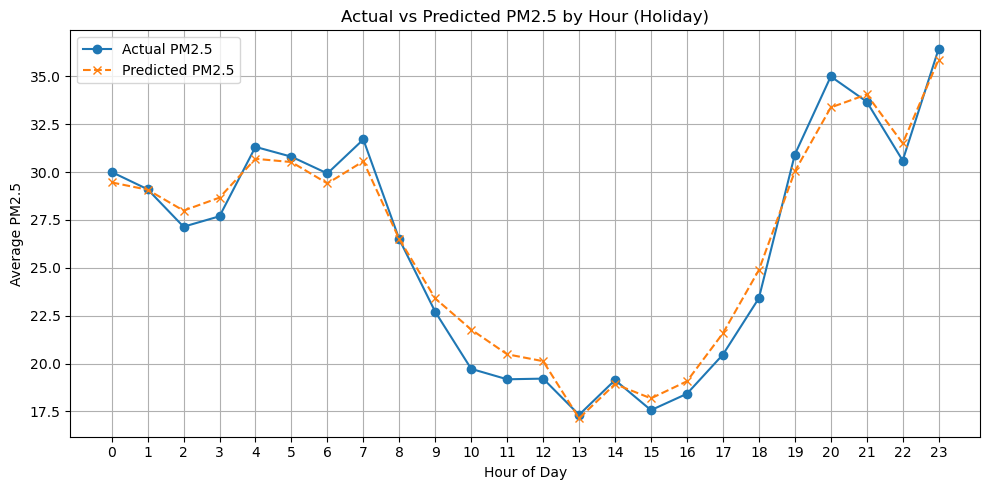

In [50]:
# --- Plot แยกตาม day_type ---
for dtype in compare_df['day_type'].unique():
    subset = compare_df[compare_df['day_type'] == dtype]
    hourly_avg = subset.groupby('hour')[['pm25_actual','pm25_predicted']].mean().reset_index()

    plt.figure(figsize=(10, 5))
    plt.plot(hourly_avg['hour'], hourly_avg['pm25_actual'], label='Actual PM2.5', marker='o')
    plt.plot(hourly_avg['hour'], hourly_avg['pm25_predicted'], label='Predicted PM2.5', marker='x', linestyle='--')
    plt.title(f'Actual vs Predicted PM2.5 by Hour ({dtype})')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average PM2.5')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [51]:
print("📊 ค่า pm25_actual หลัง inverse:")
print(compare_df['pm25_actual'].describe())

print("\n📊 ค่า pm25_predicted หลัง inverse:")
print(compare_df['pm25_predicted'].describe())


📊 ค่า pm25_actual หลัง inverse:
count    6872.000000
mean       21.371772
std        16.324890
min         0.998457
25%         8.498989
50%        16.099527
75%        31.800640
max        79.304007
Name: pm25_actual, dtype: float64

📊 ค่า pm25_predicted หลัง inverse:
count    6872.000000
mean       21.428907
std        14.970090
min         1.234474
25%         9.792080
50%        16.465053
75%        30.126521
max        76.583814
Name: pm25_predicted, dtype: float64
